# U2AF2
U2AF65 is an essential pre-mRNA splicing factor that guides the early stages of splice-site choice by recognizing polypyrimidine tract consensus sequences near the 3-prime splice site.
[developmental delay, dysmorphic facies, and brain anomalies (DEVDFB](https://omim.org/entry/620535) is caused by heterozygous mutation in the U2AF2 gene.
U2 is a small nuclear ribonucleoproteins (snRNPs). U2 auxiliary factor (U2AF) is a heterodimer that includes U2AF65 and U2AF35 and contributes to binding U2 snRNP to the pre-mRNA branch site. The U2AF2 gene encodes the large subunit U2AF65, it is an indispensable splicing factor in the early step of spliceosome assembly

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.7.1


## U2AF2
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for U2AF2.

In [2]:
gene_symbol = 'U2AF2'
mane_tx_id = 'NM_007279.3'
mane_protein_id = "NP_009210.1" # splicing factor U2AF 65 kDa subunit isoform a

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.22' 
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc = load_phenopackets(
   phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals from {gene_symbol} cohort')
qc.summarize()

Individuals Processed: 100%|██████████| 48/48 [00:02<00:00, 16.08individuals/s]
Loaded 48 individuals from U2AF2 cohort
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Global developmental delay,HP:0001263,46
Delayed gross motor development,HP:0002194,41
Delayed speech and language development,HP:0000750,41
Hypotonia,HP:0001252,26
Short palpebral fissure,HP:0012745,26
Downslanted palpebral fissures,HP:0000494,25
Prominent forehead,HP:0011220,24
Feeding difficulties,HP:0011968,23
Seizure,HP:0001250,22
Wide nasal bridge,HP:0000431,21


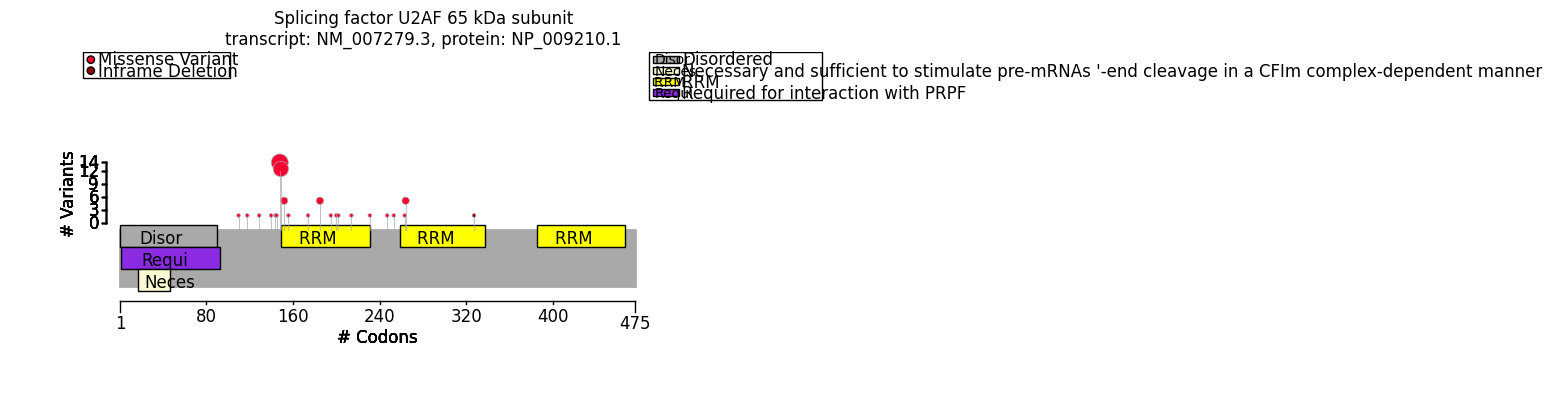

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

u2af2_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
u2af2_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Name,Type,Coordinates,Count,Variants
Disordered,REGION,1 - 90,0,
Required for interaction with PRPF19,REGION,2 - 93,0,
Necessary and sufficient to stimulate pre-mRNAs 3'-end cleavage in a CFIm complex-dependent manner,REGION,17 - 47,0,
RRM 1,DOMAIN,149 - 231,21,p.Arg150Cys; p.Val186Met; p.Asp215Gly; p.Pro157Leu; p.Val153Met; p.Glu201Asp; p.Asn196Thr; p.Arg150His; p.Arg203Cys; p.Leu175Pro
RRM 2,DOMAIN,259 - 337,4,p.Lys329del; p.Gly265Asp; p.Gly264Glu
RRM 3,DOMAIN,385 - 466,0,


In [7]:
from gpsea.view import CohortVariantViewer
cvv = CohortVariantViewer(tx_id=mane_tx_id)
cvv.process(cohort=cohort)

Variant key,Variant (cDNA),Variant (protein),Overlapping Exons,Effects,Count
19_55661148_55661148_C_T,c.445C>T,p.Arg149Trp,5,missense,12
19_55661151_55661151_C_T,c.448C>T,p.Arg150Cys,5,missense,7
19_55661152_55661152_G_A,c.449G>A,p.Arg150His,5,missense,4
19_55662571_55662571_G_A,c.556G>A,p.Val186Met,6,missense,2
19_55668558_55668558_G_A,c.794G>A,p.Gly265Asp,8,missense,2
19_55661160_55661160_G_A,c.457G>A,p.Val153Met,5,missense,2
19_55661149_55661149_G_A,c.446G>A,p.Arg149Gln,5,missense,2
19_55662602_55662602_A_C,c.587A>C,p.Asn196Thr,6,missense,1
19_55668555_55668555_G_A,c.791G>A,p.Gly264Glu,8,missense,1
19_55661173_55661173_C_T,c.470C>T,p.Pro157Leu,5,missense,1


# Genotype Phenotype Correlation (GPC) Analysis

Residues 149-150 are one of the relative hotspots of pathogenic variation in U2AF2.

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
from gpsea.view import MtcStatsViewer

r149w = VariantPredicates.variant_key(key="19_55661148_55661148_C_T") # c.445C>T	p.Arg149Trp	
r150c = VariantPredicates.variant_key(key="19_55661151_55661151_C_T") # c.448C>T	p.Arg150Cys	
r150h = VariantPredicates.variant_key(key="19_55661152_55661152_G_A") # c.449G>A	p.Arg150His
var_149_150 = VariantPredicates.any((r149w, r150c, r150h))

var_149_150_predicate = monoallelic_predicate(a_predicate=r149w, 
                                   b_predicate=~r149w, 
                                   a_label="R149,R150 variants",
                                   b_label="other",
                                   )

var_149_150_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=var_149_150_predicate,
    pheno_predicates=pheno_predicates,
)

viewer = MtcStatsViewer()
viewer.process(var_149_150_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,130
HMF03,Skipping term because of a child term with the same individual counts,8
HMF08,Skipping general term,78
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,236


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=var_149_150_result)

Allele group                                       R149,R150 variants          \
                                                                Count Percent   
Deeply set eye [HP:0000490]                                     10/10    100%   
Preauricular pit [HP:0004467]                                    4/10     40%   
Ptosis [HP:0000508]                                              8/12     67%   
Hypertelorism [HP:0000316]                                       6/11     55%   
Wide intermamillary distance [HP:0006610]                         4/7     57%   
Short neck [HP:0000470]                                          8/11     73%   
Brachydactyly [HP:0001156]                                       4/10     40%   
Intellectual disability, moderate [HP:0002342]                    4/9     44%   
Narrow nasal bridge [HP:0000446]                                 6/11     55%   
Short chin [HP:0000331]                                          6/11     55%   
Short palpebral fissure [HP:0012745]                             8/11     73%   
Wide nasal bridge [HP:0000431]                                   4/11     36%   
Feeding difficulties [HP:0011968]                                5/11     45%   
Intellectual disability, mild [HP:0001256]                        3/9     33%   
High anterior hairline [HP:0009890]                              5/10     50%   
Prominent forehead [HP:0011220]                                  7/11     64%   
Downslanted palpebral fissures [HP:0000494]                      7/11     64%   
Global developmental delay [HP:0001263]                         12/12    100%   
Neurodevelopmental delay [HP:0012758]                           12/12    100%   
Neurodevelopmental abnormality [HP:0012759]                     12/12    100%   
Intellectual disability [HP:0001249]                              9/9    100%   
Delayed gross motor development [HP:0002194]                    11/11    100%   
Motor delay [HP:0001270]                                        11/11    100%   
Delayed speech and language development [HP:000...              11/11    100%   
Abnormal communication [HP:0034434]                             11/11    100%   
Hypotonia [HP:0001252]                                           7/11     64%   
Abnormal muscle tone [HP:0003808]                                 7/7    100%   
Abnormal size of the palpebral fissures [HP:020...                8/8    100%   
Abnormality of the palpebral fissures [HP:0008050]                9/9    100%   
Abnormal eyelid morphology [HP:0000492]                           9/9    100%   
Abnormal ocular adnexa morphology [HP:0030669]                    9/9    100%   
Abnormal nasal morphology [HP:0005105]                          11/11    100%   
Abnormality of the forehead [HP:0000290]                          9/9    100%   
Abnormal nasal bridge morphology [HP:0000422]                   10/10    100%   
Slanting of the palpebral fissure [HP:0200006]                    8/8    100%   
Abnormal oral cavity morphology [HP:0000163]                    11/11    100%   
Abnormality of the mouth [HP:0000153]                           11/11    100%   
Abnormality of mouth size [HP:0011337]                            8/8    100%   
Abdominal symptom [HP:0011458]                                    5/5    100%   
Seizure [HP:0001250]                                            10/10    100%   
Abnormal digit morphology [HP:0011297]                            7/7    100%   
Abnormal appendicular skeleton morphology [HP:0...                7/7    100%   
Abnormal axial skeleton morphology [HP:0009121]                 11/11    100%   
Abnormality of the vertebral column [HP:0000925]                  8/8    100%   
Abnormal lip morphology [HP:0000159]                              9/9    100%   
Thin vermilion border [HP:0000233]                                7/7    100%   
Abnormal pinna morphology [HP:0000377]                            5/5    100%   

Allele group                  

In [11]:
r149w_predicate = monoallelic_predicate(
    a_predicate=r149w,
    b_predicate=~r149w,
    a_label="r149W",
    b_label="other"
)
r149w_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=r149w_predicate,
    pheno_predicates=pheno_predicates,
)

summarize_hpo_analysis(hpo=hpo, result=r149w_result)

Allele group                                        r149W          other  \
                                                    Count Percent  Count   
Deeply set eye [HP:0000490]                         10/10    100%  10/29   
Preauricular pit [HP:0004467]                        4/10     40%   1/33   
Ptosis [HP:0000508]                                  8/12     67%   7/34   
Hypertelorism [HP:0000316]                           6/11     55%   4/29   
Wide intermamillary distance [HP:0006610]             4/7     57%   4/29   
Short neck [HP:0000470]                              8/11     73%  10/32   
Brachydactyly [HP:0001156]                           4/10     40%   3/31   
Intellectual disability, moderate [HP:0002342]        4/9     44%   3/23   
Narrow nasal bridge [HP:0000446]                     6/11     55%   8/33   
Short chin [HP:0000331]                              6/11     55%   9/33   
Short palpebral fissure [HP:0012745]                 8/11     73%  18/33   
Wide nasal bridge [HP:0000431]                       4/11     36%  17/33   
Feeding difficulties [HP:0011968]                    5/11     45%  18/31   
Intellectual disability, mild [HP:0001256]            3/9     33%  11/23   
High anterior hairline [HP:0009890]                  5/10     50%  12/32   
Prominent forehead [HP:0011220]                      7/11     64%  17/32   
Downslanted palpebral fissures [HP:0000494]          7/11     64%  18/34   
Global developmental delay [HP:0001263]             12/12    100%  34/34   
Neurodevelopmental delay [HP:0012758]               12/12    100%  34/34   
Neurodevelopmental abnormality [HP:0012759]         12/12    100%  34/34   
Intellectual disability [HP:0001249]                  9/9    100%  20/20   
Delayed gross motor development [HP:0002194]        11/11    100%  30/32   
Motor delay [HP:0001270]                            11/11    100%  30/30   
Delayed speech and language development [HP:000...  11/11    100%  30/30   
Abnormal communication [HP:0034434]                 11/11    100%  30/30   
Hypotonia [HP:0001252]                               7/11     64%  19/29   
Abnormal muscle tone [HP:0003808]                     7/7    100%  19/19   
Abnormal size of the palpebral fissures [HP:020...    8/8    100%  18/18   
Abnormality of the palpebral fissures [HP:0008050]    9/9    100%  26/26   
Abnormal eyelid morphology [HP:0000492]               9/9    100%  28/28   
Abnormal ocular adnexa morphology [HP:0030669]        9/9    100%  28/28   
Abnormal nasal morphology [HP:0005105]              11/11    100%  26/26   
Abnormality of the forehead [HP:0000290]              9/9    100%  25/25   
Abnormal nasal bridge morphology [HP:0000422]       10/10    100%  24/24   
Slanting of the palpebral fissure [HP:0200006]        8/8    100%  23/23   
Abnormal oral cavity morphology [HP:0000163]        11/11    100%  29/29   
Abnormality of the mouth [HP:0000153]               11/11    100%  29/29   
Abnormality of mouth size [HP:0011337]                8/8    100%  14/14   
Abdominal symptom [HP:0011458]                        5/5    100%  18/18   
Seizure [HP:0001250]                                10/10    100%  17/17   
Abnormal digit morphology [HP:0011297]                7/7    100%  15/15   
Abnormal appendicular skeleton morphology [HP:0...    7/7    100%  17/17   
Abnormal axial skeleton morphology [HP:0009121]     11/11    100%  21/21   
Abnormality of the vertebral column [HP:0000925]      8/8    100%  14/14   
Abnormal lip morphology [HP:0000159]                  9/9    100%  17/17   
Thin vermilion border [HP:0000233]                    7/7    100%  14/14   
Abnormal pinna morphology [HP:0000377]                5/5    100%  16/16   

Allele group                                                                   \
                                                   Percent Corrected p values   
Deeply set eye [HP:0000490]                            34%           0.020488   
Preauricular pit [HP:0004467]   

In [12]:
# RRM 1	DOMAIN	
rrm1 = VariantPredicates.protein_feature(feature_id="RRM 1", protein_metadata=protein_meta)
rrm1_predicate = monoallelic_predicate(
    a_predicate=rrm1,
    b_predicate=~rrm1,
    a_label="RRM 1",
    b_label="other"
)
rrm1_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=rrm1_predicate,
    pheno_predicates=pheno_predicates,
)

summarize_hpo_analysis(hpo=hpo, result=rrm1_result)

Allele group                                        RRM 1          other  \
                                                    Count Percent  Count   
Deeply set eye [HP:0000490]                          5/17     29%  15/22   
Ptosis [HP:0000508]                                  4/21     19%  11/25   
Delayed gross motor development [HP:0002194]        16/18     89%  25/25   
Hypotonia [HP:0001252]                              13/17     76%  13/23   
Wide nasal bridge [HP:0000431]                      11/19     58%  10/25   
Short neck [HP:0000470]                              6/18     33%  12/25   
Intellectual disability, mild [HP:0001256]           7/13     54%   7/19   
Short chin [HP:0000331]                              5/19     26%  10/25   
Downslanted palpebral fissures [HP:0000494]         10/20     50%  15/25   
Global developmental delay [HP:0001263]             20/20    100%  26/26   
Neurodevelopmental delay [HP:0012758]               20/20    100%  26/26   
Neurodevelopmental abnormality [HP:0012759]         20/20    100%  26/26   
Intellectual disability [HP:0001249]                11/11    100%  18/18   
Motor delay [HP:0001270]                            16/16    100%  25/25   
Delayed speech and language development [HP:000...  17/17    100%  24/24   
Abnormal communication [HP:0034434]                 17/17    100%  24/24   
Abnormal muscle tone [HP:0003808]                   13/13    100%  13/13   
Short palpebral fissure [HP:0012745]                11/19     58%  15/25   
Abnormal size of the palpebral fissures [HP:020...  11/11    100%  15/15   
Abnormality of the palpebral fissures [HP:0008050]  15/15    100%  20/20   
Abnormal eyelid morphology [HP:0000492]             16/16    100%  21/21   
Abnormal ocular adnexa morphology [HP:0030669]      16/16    100%  21/21   
Abnormal nasal morphology [HP:0005105]              16/16    100%  21/21   
Abnormality of the forehead [HP:0000290]            14/14    100%  20/20   
Abnormal nasal bridge morphology [HP:0000422]       15/15    100%  19/19   
Slanting of the palpebral fissure [HP:0200006]      12/12    100%  19/19   
Abnormal oral cavity morphology [HP:0000163]        14/14    100%  26/26   
Abnormality of the mouth [HP:0000153]               14/14    100%  26/26   
Abnormality of mouth size [HP:0011337]                7/7    100%  15/15   
Feeding difficulties [HP:0011968]                    9/17     53%  14/25   
Abdominal symptom [HP:0011458]                        9/9    100%  14/14   
Seizure [HP:0001250]                                  9/9    100%  18/18   
Abnormal digit morphology [HP:0011297]                8/8    100%  14/14   
Abnormal appendicular skeleton morphology [HP:0...    9/9    100%  15/15   
High anterior hairline [HP:0009890]                  7/18     39%  10/24   
Abnormal axial skeleton morphology [HP:0009121]     13/13    100%  19/19   
Abnormality of the vertebral column [HP:0000925]      8/8    100%  14/14   
Abnormal lip morphology [HP:0000159]                10/10    100%  16/16   
Thin vermilion border [HP:0000233]                    9/9    100%  12/12   
Abnormal pinna morphology [HP:0000377]                8/8    100%  13/13   
Prominent forehead [HP:0011220]                     10/18     56%  14/25   

Allele group                                                                   \
                                                   Percent Corrected p values   
Deeply set eye [HP:0000490]                            68%                1.0   
Ptosis [HP:0000508]                                    44%                1.0   
Delayed gross motor development [HP:0002194]          100%                1.0   
Hypotonia [HP:0001252]                                 57%                1.0   
Wide nasal bridge [HP:0000431]                         40%                1.0   
Short neck [HP:0000470]                                48%                1.0   
Intellectual disability, mild [HP:0001256]             37%                1.0   
Sh

In [13]:
from gpsea.analysis.predicate.genotype import sex_predicate
mf_predicate = sex_predicate()

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=mf_predicate,
    pheno_predicates=pheno_predicates,
)

summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
Feeding difficulties [HP:0011968]                    9/24     38%  14/18   
Short chin [HP:0000331]                             11/25     44%   4/19   
Downslanted palpebral fissures [HP:0000494]         12/26     46%  13/19   
High anterior hairline [HP:0009890]                  8/24     33%   9/18   
Micrognathia [HP:0000347]                            7/25     28%   8/19   
Short palpebral fissure [HP:0012745]                13/25     52%  13/19   
Wide nasal bridge [HP:0000431]                      10/25     40%  11/19   
Deeply set eye [HP:0000490]                          9/20     45%  11/19   
Intellectual disability, mild [HP:0001256]           8/16     50%   6/16   
Hypotonia [HP:0001252]                              15/22     68%  11/18   
Prominent forehead [HP:0011220]                     13/25     52%  11/18   
Global developmental delay [HP:0001263]             27/27    100%  19/19   
Neurodevelopmental delay [HP:0012758]               27/27    100%  19/19   
Neurodevelopmental abnormality [HP:0012759]         27/27    100%  19/19   
Intellectual disability [HP:0001249]                15/15    100%  14/14   
Delayed gross motor development [HP:0002194]        24/25     96%  17/18   
Motor delay [HP:0001270]                            24/24    100%  17/17   
Delayed speech and language development [HP:000...  23/23    100%  18/18   
Abnormal communication [HP:0034434]                 23/23    100%  18/18   
Abnormal muscle tone [HP:0003808]                   15/15    100%  11/11   
Abnormal size of the palpebral fissures [HP:020...  13/13    100%  13/13   
Abnormality of the palpebral fissures [HP:0008050]  20/20    100%  15/15   
Abnormal eyelid morphology [HP:0000492]             21/21    100%  16/16   
Abnormal ocular adnexa morphology [HP:0030669]      21/21    100%  16/16   
Abnormal nasal morphology [HP:0005105]              22/22    100%  15/15   
Abnormality of the forehead [HP:0000290]            18/18    100%  16/16   
Abnormal nasal bridge morphology [HP:0000422]       20/20    100%  14/14   
Slanting of the palpebral fissure [HP:0200006]      17/17    100%  14/14   
Abnormal oral cavity morphology [HP:0000163]        24/24    100%  16/16   
Abnormality of the mouth [HP:0000153]               24/24    100%  16/16   
Abnormality of mouth size [HP:0011337]              12/12    100%  10/10   
Abdominal symptom [HP:0011458]                        9/9    100%  14/14   
Seizure [HP:0001250]                                17/17    100%  10/10   
Abnormal digit morphology [HP:0011297]              10/10    100%  12/12   
Abnormal appendicular skeleton morphology [HP:0...  12/12    100%  12/12   
Abnormal axial skeleton morphology [HP:0009121]     18/18    100%  14/14   
Short neck [HP:0000470]                             10/25     40%   8/18   
Abnormality of the vertebral column [HP:0000925]    11/11    100%  11/11   
Abnormal lip morphology [HP:0000159]                15/15    100%  11/11   
Thin vermilion border [HP:0000233]                  13/13    100%    8/8   
Abnormal pinna morphology [HP:0000377]                9/9    100%  12/12   

Sex                                                                            \
                                                   Percent Corrected p values   
Feeding difficulties [HP:0011968]                      78%           0.545913   
Short chin [HP:0000331]                                21%           1.000000   
Downslanted palpebral fissures [HP:0000494]            68%           1.000000   
High anterior hairline [HP:0009890]                    50%           1.000000   
Micrognathia [HP:0000347]                              42%           1.000000   
Short palpebral fissure [HP:0012745]                   68%           1.000000   
Wide nasal bridge [HP:0000431]                         58%           1.000000   
De

# Summary

In [14]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary


ft_results = (
    GPAnalysisResultSummary.from_multi(
        result=r149w_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=var_149_150_result
    ),
     GPAnalysisResultSummary.from_mono(
        result=rrm1_result
    )
    ,
     GPAnalysisResultSummary.from_mono(
        result=mf_result
    )
)

caption = "No statistical analysis of GPCs in U2AF2 identified in published literature."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=ft_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [15]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [16]:
summarizer.process_latex(report=report, protein_fig=u2af2_fig)

Figure saved to ../../supplement/img/U2AF2_protein_diagram-draft.pdf
Output to ../../supplement/tex/U2AF2_summary_draft.tex
